In [1]:
import numpy as np

COLORS = {
    "Gray": np.array([169, 169, 169]),
    "LightGray": np.array([217, 217, 217]),
    "DarkGray": np.array([117, 117, 117]),
    "DarkRed": np.array([238, 125, 95]),
    "LightRed": np.array([247, 207, 196]),
    "DarkRedBorder": np.array([202, 65, 35]),
    "Yellow": np.array([255, 201, 67]),
    "LightYellow": np.array([255, 236, 189]),
    "LightGreen": np.array([213, 243, 214]),
    "Green": np.array([131, 211, 127]),
    "GreenBorder": np.array([88, 153, 84]),
    "LightBlue": np.array([201, 228, 252]),
    "LightBlueBorder": np.array([94, 171, 248]),
    "Blue": np.array([94, 171, 248]),
    "Black": np.array([40, 45, 50]),
    "White": np.array([255, 255, 255]),
    "LightPink": np.array([246, 196, 233]),
    "Pink": np.array([229, 87, 189]),
}

Test


# Install packages
```cmd
pip install psycopg

```


In [54]:
import psycopg
from psycopg.rows import dict_row

def getDbConn():
    return psycopg.connect(
        host="localhost",
        dbname="tdt4900",
        user="postgres",
        password="postgres",
        row_factory=dict_row
    )


In [96]:
db_conn = getDbConn()
execution_times = {}

simulation_ids = [3030,3031,3035,3036]

for sim_id in simulation_ids:
    simulation = db_conn.cursor().execute(f'SELECT * FROM "Simulations" WHERE "Id" = {sim_id}').fetchall()[0]
    graph_id = simulation['GraphId']

    execution_time = simulation['AlgorithmExecutionTime']
    level = db_conn.cursor().execute(f'SELECT MAX("Level") FROM "Edge" WHERE "GraphId" = {graph_id}').fetchall()[0]['max']

    execution_times[level] = execution_time

db_conn.disconnect()

UndefinedTable: relation "Edge" does not exist
LINE 1: SELECT MAX("Level") FROM "Edge" WHERE "GraphId" = 414
                                 ^

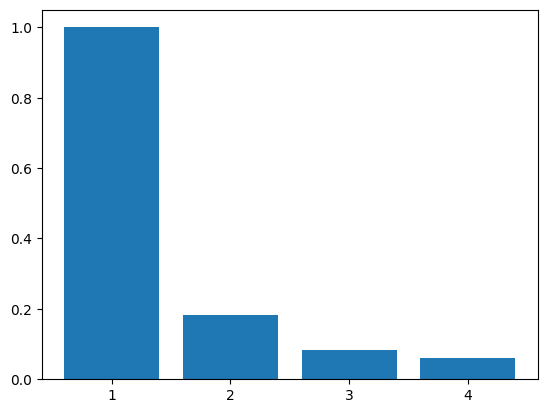

In [95]:
import matplotlib.pyplot as plt
import numpy as np

fix, ax = plt.subplots()
x = np.array(sorted(execution_times.keys()))
y = np.array([execution_times[i] for i in x])

# Normalize (
norm_y = y / (y.max())

x = [str(num + 1) for num in x]

plt.bar(x, norm_y)
plt.show()

In [98]:
db_conn.close()
